# Introduction
We will use the pacakge **FDwavePY**.
This wave simulation package is based upon the Finite Difference method. It is in the development stage.
It has following options: 
1. Model  
    1. Dimension: <font color='blue'>1D model, </font> 2D model, 3D model
    2. Rheologies: <font color='blue'>Scalar, Acoustic, Elastic, Viscoacoustic, Viscoelastic, Anisotropic</font>
    3. Distribution: <font color='blue'>Homogeneous, Layered, UserDefined</font>
3. Source
    1. Kind: <font color='blue'>Point Source</font>, MomentTensor    
    3. Signature: : <font color='blue'>Sine, Triangle, Ricker</font>, etc.
4. Layout:
   1. Source layout: <font color='blue'>Single/Array</font>, Surface/VSP, Random
   2. Receiver layout: <font color='blue'>single/array</font>, Surface/VSP, Random
      
6. Boundaries: <font color='blue'>Reflecting</font>
    1. FS: <font color='blue'>.</font>Image
    2. ABC/ABL: <font color='blue'>.</font>Mur/Raynold/Damp/PML

7. Simulation: <font color='blue'>Scalar</font> Acoustic, Elastic, Viscoacoustic, Viscoelastic, Anisotropic
    1. Gridding : <font color='blue'>Normal (A)</font>, Staggered (B,C,D,E)
    2. Topography: <font color='blue'>Flat</font>,
    3. Spatial Scheme: <font color='blue'>Explicit</font>, Implicit, Hybrid
    4. Spatial Accuracy: <font color='blue'>2,4,</font>,8, etc.
    5. Temporal scheme: <font color='blue'>2,4,</font>,8, etc.


## Import required packages


In [2]:
import FDwavePY as sim
import numpy as np
import matplotlib.pyplot as plt

# 1. Simulation: Model generation and visualization

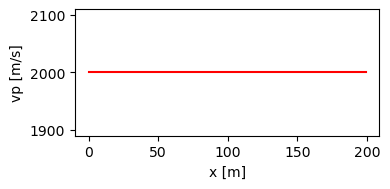

In [8]:

s = sim.FDwavePY(rheo='sc', dim=1, skind='Point')         # initialize the structure
s.mod.homogeneous(vp=2000, nodes=200, dh=1)        # define the model 
s.mod.plot(figsize=[4,2])

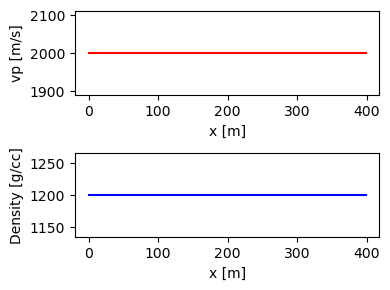

In [17]:
s = sim.FDwavePY(rheo='ac', dim=1)        # initialize the structure
s.mod.homogeneous(vp=2000, rho=1200, nodes=200, dh=2)        # define the model 
s.mod.plot(figsize=[4,3])

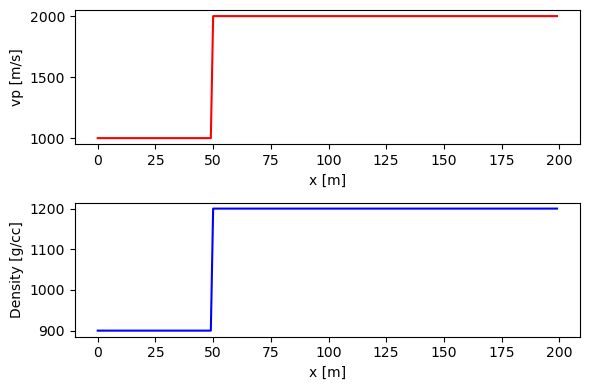

In [13]:
# user defined models
s.mod.vp.mp[0:50] = np.ones(50)*1000
s.mod.rho.mp[0:50] = np.ones(50)*900
s.mod.plot()

# Acessing the properties

P-Wave


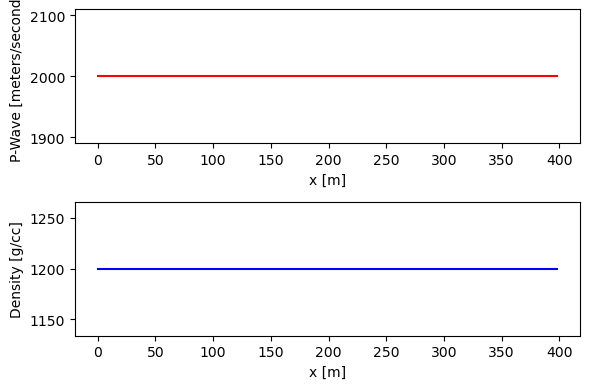

In [21]:
s = sim.FDwavePY(rheo='ac', dim=1)                     # initialize the structure
s.mod.homogeneous(vp=2000, rho=1200, nodes=200, dh=2)  # define the model 
s.mod.vp.name = 'P-Wave'
s.mod.vp.unit = 'meters/second'
print(s.mod.vp.name)
s.mod.plot()

In [24]:
s.mod.vp.ax1.name

'x'

In [25]:
s.mod.vp.ax1.unit

'm'

# Accessing features that are not implemented

In [27]:
s = sim.FDwavePY(rheo='el', dim=1)        # initialize the structure
s.mod.homogeneous(2000, 1800, 1200, 80, 60, 200)        # define the model 
# s.mod.plot(overlay= True)
s.mod.plot(overlay= False)

ValueError: Name and dim can not be empty

# Source Signature

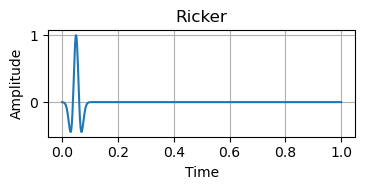

In [29]:
s.src.ricker()
s.src.plot()

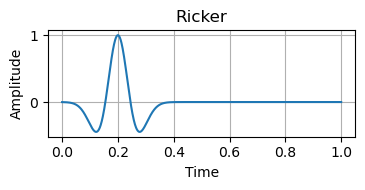

In [37]:
s.src.ricker(freq=5, dt=0.001, T=1, t0=.2, scale=1)
s.src.plot()

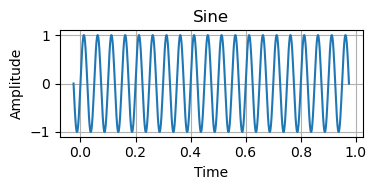

In [30]:
s.src.sine()
s.src.plot()

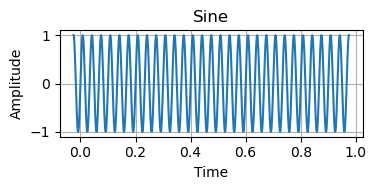

In [39]:
s.src.sine(freq=30, dt=0.001, T=1, t0=.025, scale=1)
s.src.plot()

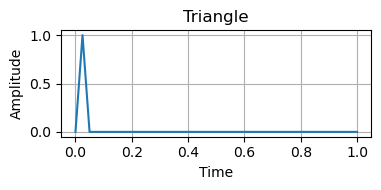

In [45]:
s.src.triangle()
s.src.plot()

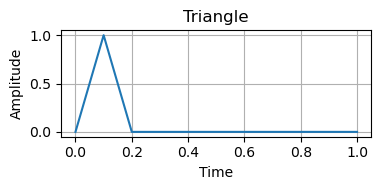

In [46]:
s.src.triangle(freq=5, dt=0.001, T=1, t0=.025, scale=1)
s.src.plot()

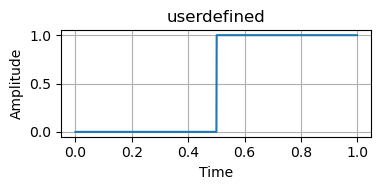

In [49]:
tvec = np.arange(0,1000)*.001
svec = np.zeros_like(tvec)
svec[tvec>.5] =1
s.src.userdefined(svec, tvec)
s.src.plot()

# Source-Receiver layout 

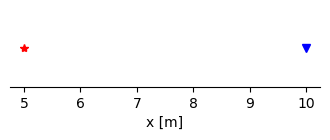

In [4]:
s = sim.FDwavePY(rheo='sc', dim=1) 
s.layout.add_src_rec(5, 10)
s.layout.plot(figsize=[4,1])

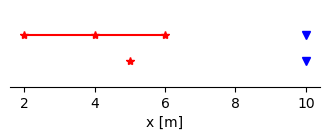

In [5]:
s.layout.add_src_rec([2,4,6], 10)
s.layout.plot(figsize=[4,1])

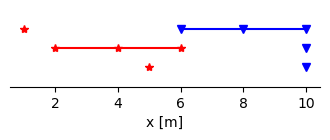

In [6]:
s.layout.add_src_rec(1, [6,8,10])
s.layout.plot(figsize=[4,1])

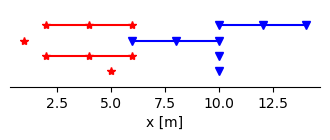

In [7]:
s.layout.add_src_rec([2,4,6], [10,12,14])
s.layout.plot(figsize=[4,1])

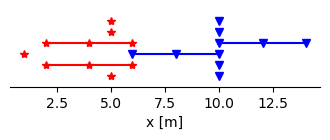

In [9]:
s.layout.predef_s1r1(5, 10)
s.layout.plot(figsize=[4,1])

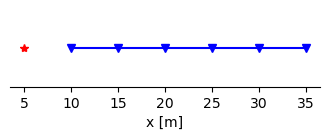

In [10]:
s = sim.FDwavePY(rheo='sc', dim=1) 
s.layout.predef_s1rn(5, [10, 15, 20, 25, 30, 35])
s.layout.plot(figsize=[4,1])

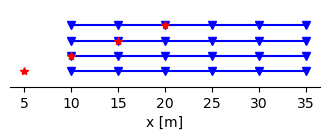

In [11]:
s = sim.FDwavePY(rheo='sc', dim=1) 
s.layout.predef_snrn_fixed([5, 10, 15, 20],   [10, 15, 20, 25, 30, 35])
s.layout.plot(figsize=[4,1])

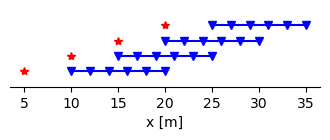

In [13]:
s = sim.FDwavePY(rheo='sc', dim=1) 
s.layout.predef_snrn_rollover([5, 10, 15, 20], [10, 12, 14, 16,18, 20], rroll=5)
s.layout.plot(figsize=[4,1])